# Data Scientist Job Change Analysis Project

### Importing Required libraries

In [3]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from lazypredict.Supervised import LazyClassifier, LazyRegressor
from sklearn.preprocessing import LabelEncoder, QuantileTransformer, StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix, classification_report, RocCurveDisplay
from sklearn.model_selection import GridSearchCV, cross_validate
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

#### Overview of dataset
- **enrollee_id**: Unique ID for candidate.

- **city**: City code.

- **city_development_index**: Development index of the city (scaled).

- **gender**: Gender of candidate.

- **relevant_experience**: Relevant experience of candidate.

- **enrolled_university**: Type of University course enrolled if any.

- **education_level**: Education level of candidate.

- **major_discipline**: Education major discipline of candidate.

- **experience**: Candidate total experience in years.

- **company_size**: Number of employees in current employer's company.

- **company_type**: Type of current employer.

- **last_new_job**: Difference in years between previous job and current job.

- **training_hours**: Training hours completed.

- **target**: 0 – Not looking for job change, 1 – Looking for a job change.
 a job change

## 1. Data Collection / Data Loading

In [6]:
#loading the dataset into the dataframe
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [7]:
train.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.92,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.00
1,29725,city_40,0.78,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.00
2,11561,city_21,0.62,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.00
3,33241,city_115,0.79,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.00
4,666,city_162,0.77,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.00


In [8]:
test.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours
0,32403,city_41,0.83,Male,Has relevent experience,Full time course,Graduate,STEM,9,<10,NaN,1,21
1,9858,city_103,0.92,Female,Has relevent experience,no_enrollment,Graduate,STEM,5,NaN,Pvt Ltd,1,98
2,31806,city_21,0.62,Male,No relevent experience,no_enrollment,High School,NaN,<1,NaN,Pvt Ltd,never,15
3,27385,city_13,0.83,Male,Has relevent experience,no_enrollment,Masters,STEM,11,10/49,Pvt Ltd,1,39
4,27724,city_103,0.92,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,10000+,Pvt Ltd,>4,72


In [9]:
train.shape

(19158, 14)

In [10]:
test.shape

(2129, 13)

In [11]:
train.size

268212

In [12]:
test.size

27677

## 2. Data Preprocessing

In [14]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             19158 non-null  int64  
 1   city                    19158 non-null  object 
 2   city_development_index  19158 non-null  float64
 3   gender                  14650 non-null  object 
 4   relevent_experience     19158 non-null  object 
 5   enrolled_university     18772 non-null  object 
 6   education_level         18698 non-null  object 
 7   major_discipline        16345 non-null  object 
 8   experience              19093 non-null  object 
 9   company_size            13220 non-null  object 
 10  company_type            13018 non-null  object 
 11  last_new_job            18735 non-null  object 
 12  training_hours          19158 non-null  int64  
 13  target                  19158 non-null  float64
dtypes: float64(2), int64(2), object(10)
me

In [15]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2129 entries, 0 to 2128
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             2129 non-null   int64  
 1   city                    2129 non-null   object 
 2   city_development_index  2129 non-null   float64
 3   gender                  1621 non-null   object 
 4   relevent_experience     2129 non-null   object 
 5   enrolled_university     2098 non-null   object 
 6   education_level         2077 non-null   object 
 7   major_discipline        1817 non-null   object 
 8   experience              2124 non-null   object 
 9   company_size            1507 non-null   object 
 10  company_type            1495 non-null   object 
 11  last_new_job            2089 non-null   object 
 12  training_hours          2129 non-null   int64  
dtypes: float64(1), int64(2), object(10)
memory usage: 216.4+ KB


In [16]:
train.describe()

,enrollee_id,city_development_index,training_hours,target
count,19158.00,19158.00,19158.00,19158.00
mean,16875.36,0.83,65.37,0.25
std,9616.29,0.12,60.06,0.43
min,1.00,0.45,1.00,0.00
25%,8554.25,0.74,23.00,0.00
50%,16982.50,0.90,47.00,0.00
75%,25169.75,0.92,88.00,0.00
max,33380.00,0.95,336.00,1.00


In [17]:
test.describe()

,enrollee_id,city_development_index,training_hours
count,2129.00,2129.00,2129.00
mean,16861.61,0.82,64.98
std,9576.85,0.13,60.24
min,3.00,0.45,1.00
25%,8562.00,0.70,23.00
50%,16816.00,0.90,47.00
75%,25129.00,0.92,86.00
max,33353.00,0.95,334.00


### 2.1 Finding null values

In [19]:
train['enrollee_id'].isnull().sum()

0

In [20]:
test['enrollee_id'].isnull().sum()

0

In [21]:
train['city'].isnull().sum()                     #Filled

0

In [22]:
test['city'].isnull().sum()                      #Filled

0

In [23]:
train['city_development_index'].isnull().sum()   #Filled

0

In [24]:
test['city_development_index'].isnull().sum()    #Filled

0

In [25]:
train['gender'].isnull().sum()                   #Filled           

4508

In [26]:
test['gender'].isnull().sum()                   #Filled

508

In [27]:
train['relevent_experience'].isnull().sum()     #Filled

0

In [28]:
test['relevent_experience'].isnull().sum()      #Filled

0

In [29]:
train['enrolled_university'].isnull().sum()     #Filled

386

In [30]:
test['enrolled_university'].isnull().sum()      #Filled

31

In [31]:
train['education_level'].isnull().sum()        #Filled

460

In [32]:
test['education_level'].isnull().sum()        #Filled

52

In [33]:
a = train['education_level'].unique().tolist()
a

['Graduate', 'Masters', 'High School', nan, 'Phd', 'Primary School']

In [34]:
del a[-3]

In [35]:
a

['Graduate', 'Masters', 'High School', 'Phd', 'Primary School']

In [36]:
print("For training dataset")
print('------------------------')
# Initialize counters
g = m = h = n = p = s = 0

# Iterate through each row in the training dataset
for i, row in train.iterrows():
    if pd.isna(row['education_level']):
        n += 1  # Count NaN values
    elif row['education_level'] == a[0]:
        g += 1  # Graduate count
    elif row['education_level'] == a[1]:
        m += 1  # Masters count
    elif row['education_level'] == a[2]:
        h += 1  # High School count
    elif row['education_level'] == a[3]:
        p += 1  # PhD count
    elif row['education_level'] == a[4]:
        s += 1  # Primary School count

# Print the counts
print(f'Graduate      = {g}\nMasters       = {m}\nHigh School   = {h}\nNaN           = {n}\nPhD           = {p}\nPrimary School= {s}')
print('------------------------')

For training dataset
------------------------
Graduate      = 11598
Masters       = 4361
High School   = 2017
NaN           = 460
PhD           = 414
Primary School= 308
------------------------


In [37]:
a[3]

'Phd'

In [38]:
print("For testing dataset")
print('--------------------------')
g1 = 0
m1 = 0
h1 = 0
n1 = 0
p1 = 0
s1 = 0
for i,row in test.iterrows():
    if pd.isna(row['education_level']):
        n1 = n1+1
    elif row['education_level'] == a[0]:
        g1 = g1+1
    elif row['education_level'] == a[1]:
        m1 = m1+1
    elif row['education_level'] == a[2]:
        h1 = h1+1
    elif row['education_level'] == a[3]:
        p1 = p1+1
    else:
        s1 = s1+1
# Print the counts
print(f'Graduate      = {g1}\nMasters       = {m1}\nHigh School   = {h1}\nNaN           = {n1}\nPhD           = {p1}\nPrimary School= {s1}')
print('------------------------')

For testing dataset
--------------------------
Graduate      = 1269
Masters       = 496
High School   = 222
NaN           = 52
PhD           = 54
Primary School= 36
------------------------


In [39]:
train['major_discipline'].isnull().sum()  #Filled

2813

In [40]:
test['major_discipline'].isnull().sum()   #Filled

312

In [41]:
b = train['major_discipline'].unique().tolist()
b

['STEM', 'Business Degree', nan, 'Arts', 'Humanities', 'No Major', 'Other']

In [42]:
del b[-5]
b

['STEM', 'Business Degree', 'Arts', 'Humanities', 'No Major', 'Other']

In [43]:
st = bs = ar = hu = nm = ot = nan_count = 0
print('------------------------')
for i, row in train.iterrows():
    if pd.isna(row['major_discipline']):
        nan_count += 1
    elif row['major_discipline'] == b[0]:
        st += 1
    elif row['major_discipline'] == b[1]:
        bs += 1
    elif row['major_discipline'] == b[2]:
        ar += 1
    elif row['major_discipline'] == b[3]:
        hu += 1
    elif row['major_discipline'] == b[4]:
        nm += 1
    else:
        ot += 1

print('STEM            = {}\nBusiness Degree = {}\nnan_count       = {}\nArts            = {}\nHumanities      = {}\nNo Major        = {}\nOther           = {}'.format(st,bs,nan_count,ar,hu,nm,ot)) 
print('------------------------')

------------------------
STEM            = 14492
Business Degree = 327
nan_count       = 2813
Arts            = 253
Humanities      = 669
No Major        = 223
Other           = 381
------------------------


In [44]:
train['experience'].isnull().sum() #filled

65

In [45]:
test['experience'].isnull().sum() #filled

5

In [46]:
lst = []
nlst = []
for i,row in train.iterrows():
    if row['experience'] == '>20':
        exp = 20
        lst.append(int(exp))
    elif row['experience'] == '<1':
        exp = 1
        lst.append(int(exp))
    elif pd.isna(row['experience']):  # Check if the value is NaN
        nlst.append(row['experience'])   # If it's NaN, append as is or handle accordingly
    else:
        lst.append(int(row['experience']))

In [47]:
lst

[20,
 15,
 5,
 1,
 20,
 11,
 5,
 13,
 7,
 17,
 2,
 5,
 20,
 2,
 5,
 16,
 1,
 2,
 7,
 4,
 11,
 11,
 10,
 1,
 5,
 4,
 14,
 5,
 11,
 18,
 20,
 19,
 5,
 20,
 12,
 10,
 1,
 20,
 12,
 3,
 16,
 4,
 6,
 9,
 9,
 5,
 5,
 19,
 15,
 11,
 4,
 10,
 5,
 3,
 4,
 20,
 2,
 20,
 2,
 20,
 6,
 6,
 13,
 20,
 3,
 10,
 4,
 15,
 14,
 2,
 20,
 1,
 2,
 5,
 1,
 5,
 5,
 3,
 9,
 2,
 15,
 20,
 20,
 5,
 4,
 15,
 1,
 4,
 11,
 6,
 4,
 3,
 3,
 5,
 10,
 9,
 2,
 2,
 6,
 6,
 8,
 20,
 11,
 5,
 12,
 20,
 9,
 2,
 20,
 20,
 8,
 10,
 4,
 2,
 6,
 20,
 3,
 7,
 9,
 10,
 11,
 20,
 12,
 6,
 7,
 11,
 3,
 20,
 15,
 6,
 20,
 12,
 20,
 20,
 2,
 3,
 3,
 2,
 10,
 5,
 8,
 9,
 20,
 20,
 20,
 14,
 12,
 6,
 4,
 9,
 4,
 20,
 11,
 20,
 6,
 15,
 14,
 6,
 13,
 17,
 20,
 20,
 6,
 18,
 15,
 20,
 20,
 20,
 20,
 10,
 20,
 5,
 3,
 2,
 20,
 20,
 9,
 20,
 4,
 5,
 20,
 6,
 20,
 20,
 4,
 10,
 20,
 14,
 15,
 12,
 2,
 13,
 1,
 4,
 14,
 15,
 20,
 13,
 20,
 9,
 2,
 7,
 5,
 3,
 5,
 2,
 20,
 20,
 2,
 1,
 4,
 3,
 4,
 3,
 5,
 20,
 3,
 20,
 6,
 9,
 20,
 10,
 3,
 6

In [48]:
print(np.mean(lst))

9.955376315927303


In [49]:
print(np.median(lst))

9.0


In [50]:
print(np.bincount(lst).argmax())

20


In [51]:
lst1 = []
nlst1 = []
for i,row in test.iterrows():
    if row['experience'] == '>20':
        exp1 = 20
        lst1.append(int(exp))
    elif row['experience'] == '<1':
        exp1 = 1
        lst1.append(int(exp))
    elif pd.isna(row['experience']):  # Check if the value is NaN
        nlst1.append(row['experience'])   # If it's NaN, append as is or handle accordingly
    else:
        lst1.append(int(row['experience']))

In [52]:
print(np.mean(lst1))

6.533427495291902


In [53]:
print(np.median(lst1))

5.0


In [54]:
print(np.bincount(lst1).argmax())

1


In [55]:
train['company_size'].isnull().sum()    #filled

5938

In [56]:
train['company_size'].unique()

array([nan, '50-99', '<10', '10000+', '5000-9999', '1000-4999', '10/49',
       '100-500', '500-999'], dtype=object)

In [57]:
train['company_size'].mode()

0    50-99
Name: company_size, dtype: object

In [58]:
test['company_size'].isnull().sum()     #filled

622

In [59]:
test['company_size'].mode()

0    50-99
Name: company_size, dtype: object

In [60]:
train['company_type'].isnull().sum()      #filled

6140

In [61]:
train['company_type'].unique()

array([nan, 'Pvt Ltd', 'Funded Startup', 'Early Stage Startup', 'Other',
       'Public Sector', 'NGO'], dtype=object)

In [62]:
train['company_type'].mode()

0    Pvt Ltd
Name: company_type, dtype: object

In [63]:
test['company_type'].isnull().sum()      #filled

634

In [64]:
test['company_type'].mode()

0    Pvt Ltd
Name: company_type, dtype: object

In [65]:
train['last_new_job'].isnull().sum()          #filled

423

In [66]:
train['last_new_job'].unique()

array(['1', '>4', 'never', '4', '3', '2', nan], dtype=object)

In [67]:
train['last_new_job'].mode()

0    1
Name: last_new_job, dtype: object

In [68]:
test['last_new_job'].isnull().sum()           #filled

40

In [69]:
test['last_new_job'].mode()

0    1
Name: last_new_job, dtype: object

In [70]:
train['training_hours'].isnull().sum()

0

In [71]:
test['training_hours'].isnull().sum()

0

In [72]:
train['target'].isnull().sum()

0

### 2.2 Filling null values

In [74]:
# Filling null values in the gender
train['gender'] = train['gender'].fillna('Not Known')
test['gender'] = test['gender'].fillna('Not Known')

In [75]:
train['gender'].isnull().sum()

0

In [76]:
test['gender'].isnull().sum()

0

In [77]:
train['enrolled_university'] = train['enrolled_university'].fillna('Not Known')

In [78]:
test['enrolled_university'] = test['enrolled_university'].fillna('Not Known')

In [79]:
train['enrolled_university'].isnull().sum()

0

In [80]:
test['enrolled_university'].isnull().sum()

0

In [81]:
train['education_level'] = train['education_level'].fillna('Not Known')

In [82]:
test['education_level'] = test['education_level'].fillna('Not Known')

In [83]:
train['education_level'].isnull().sum()

0

In [84]:
test['education_level'].isnull().sum()

0

In [85]:
train['major_discipline'] = train['major_discipline'].fillna('Not Known')
test['major_discipline'] = test['major_discipline'].fillna('Not Known')

In [86]:
train['major_discipline'].isnull().sum()

0

In [87]:
test['major_discipline'].isnull().sum()

0

In [88]:
train['experience'] = train['experience'].fillna('9')
test['experience'] = test['experience'].fillna('9')

In [89]:
train['experience'].isnull().sum()

0

In [90]:
test['experience'].isnull().sum()

0

In [91]:
train_int = []
for i,row in train.iterrows():
    if row['experience'] == '>20':
        exp2 = 20
        train_int.append(int(exp))
    elif row['experience'] == '<1':
        exp2 = 1
        train_int.append(int(exp))
    else:
        train_int.append(int(row['experience']))

In [92]:
train['experience']=train_int

In [93]:
test_int = []
for i,row in test.iterrows():
    if row['experience'] == '>20':
        exp3 = 20
        test_int.append(int(exp))
    elif row['experience'] == '<1':
        exp3 = 1
        test_int.append(int(exp))
    else:
        test_int.append(int(row['experience']))

In [94]:
test['experience']=test_int

In [95]:
train['company_size'] = train['company_size'].fillna('50-99')
test['company_size'] = test['company_size'].fillna('50-99')

In [96]:
train['company_size'].isnull().sum()

0

In [97]:
test['company_size'].isnull().sum()

0

In [98]:
train['company_type'] = train['company_type'].fillna('Pvt Ltd')
test['company_type'] = test['company_type'].fillna('Pvt Ltd')

In [99]:
train['company_type'].isnull().sum()

0

In [100]:
test['company_type'].isnull().sum()

0

In [101]:
train['last_new_job'] = train['last_new_job'].fillna('1')
test['last_new_job'] = test['last_new_job'].fillna('1')

In [102]:
train['last_new_job'].isnull().sum()

0

In [103]:
test['last_new_job'].isnull().sum()

0

In [104]:
train['last_new_job'].unique()

array(['1', '>4', 'never', '4', '3', '2'], dtype=object)

In [105]:
# Replace 'never' with 0
train['last_new_job'] = train['last_new_job'].replace('never', 0)
# Replace '>4' with 5
train['last_new_job'] = train['last_new_job'].replace('>4', 5).astype(int)

In [106]:
# Replace 'never' with 0
test['last_new_job'] = test['last_new_job'].replace('never', 0)
# Replace '>4' with 5
test['last_new_job'] = test['last_new_job'].replace('>4', 5).astype(int)

In [107]:
train['target'] = train['target'].astype(int)

In [108]:
train.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.92,Male,Has relevent experience,no_enrollment,Graduate,STEM,1,50-99,Pvt Ltd,1,36,1
1,29725,city_40,0.78,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,5,47,0
2,11561,city_21,0.62,Not Known,No relevent experience,Full time course,Graduate,STEM,5,50-99,Pvt Ltd,0,83,0
3,33241,city_115,0.79,Not Known,No relevent experience,Not Known,Graduate,Business Degree,1,50-99,Pvt Ltd,0,52,1
4,666,city_162,0.77,Male,Has relevent experience,no_enrollment,Masters,STEM,1,50-99,Funded Startup,4,8,0


In [109]:
#All the null values have been filled

## 3. Exploratory Data Analysis (EDA)

In [111]:
train.nunique()

enrollee_id               19158
city                        123
city_development_index       93
gender                        4
relevent_experience           2
enrolled_university           4
education_level               6
major_discipline              7
experience                   20
company_size                  8
company_type                  6
last_new_job                  6
training_hours              241
target                        2
dtype: int64

In [112]:
# Group by education_level and calculate the mean of training_hours for each level
education_training_hours = train.groupby('education_level')['training_hours'].mean()
education_training_hours

education_level
Graduate         65.77
High School      66.68
Masters          63.27
Not Known        68.45
Phd              67.52
Primary School   63.63
Name: training_hours, dtype: float64

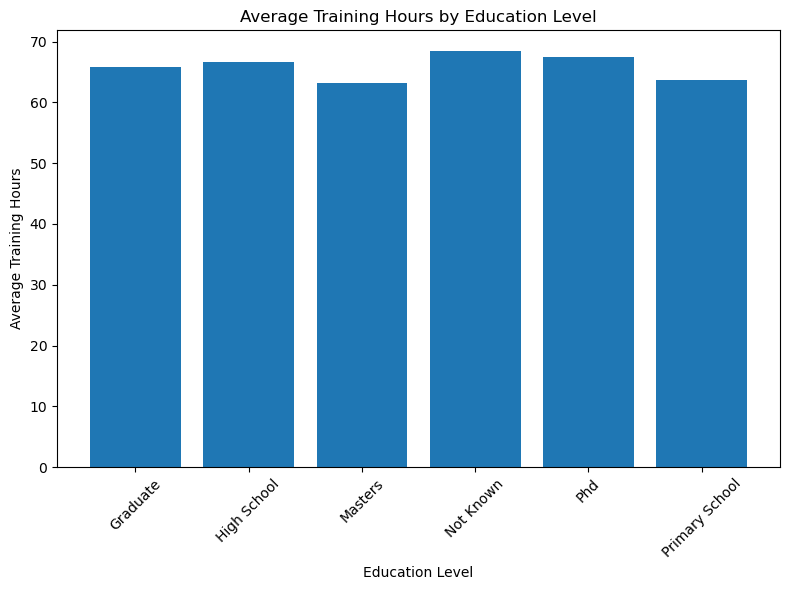

In [113]:
# Plotting the bar chart
plt.figure(figsize=(8,6))
plt.bar(education_training_hours.index, education_training_hours.values)

# Add labels and title
plt.xlabel('Education Level')
plt.ylabel('Average Training Hours')
plt.title('Average Training Hours by Education Level')

# Rotate x-axis labels for better visibility
plt.xticks(rotation=45)

# Display the chart
plt.tight_layout()
plt.show()

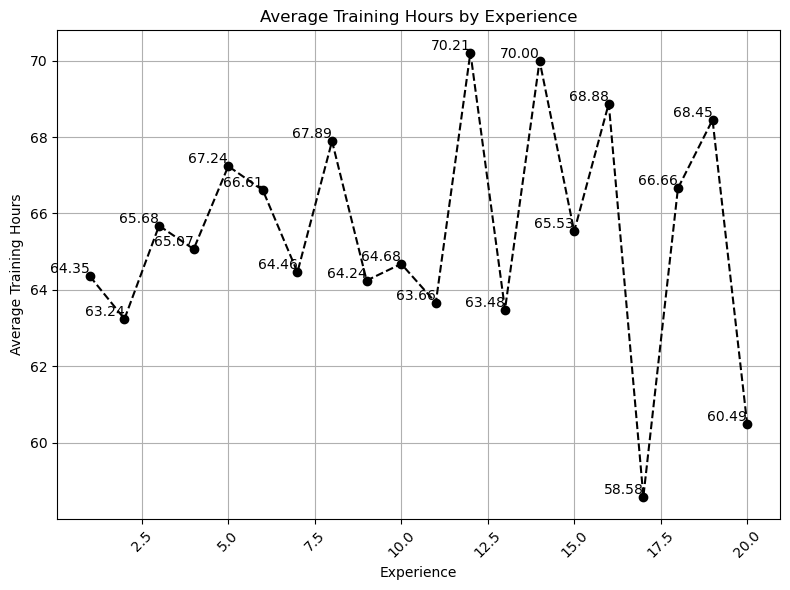

In [114]:
# Group by experience  and calculate the mean of training_hours for each level
experience_training_hours = train.groupby('experience')['training_hours'].mean()

# Plotting the bar chart
plt.figure(figsize=(8,6))
plt.plot(experience_training_hours.index, experience_training_hours.values, color = 'black',marker = 'o',linestyle='dashed')

# Annotate each marker with its value
#enumerate - iterate through each value
#plt.text = to place value near each marker
#experience_training_hours.index[i] and value specify the position of the text.
#f'{value:.2f}' formats the value to two decimal places.
#fontsize=12 sets the font size.
#ha='right' and va='bottom' set horizontal and vertical alignment, respectively.
for i, value in enumerate(experience_training_hours.values):
    plt.text(experience_training_hours.index[i], value, f'{value:.2f}', fontsize=10, ha='right', va='bottom')
    
# Add labels and title
plt.xlabel('Experience')
plt.ylabel('Average Training Hours')
plt.title('Average Training Hours by Experience')

# Rotate x-axis labels for better visibility
plt.xticks(rotation=45)

# Display the chart
plt.grid(True)
plt.tight_layout()
plt.show()

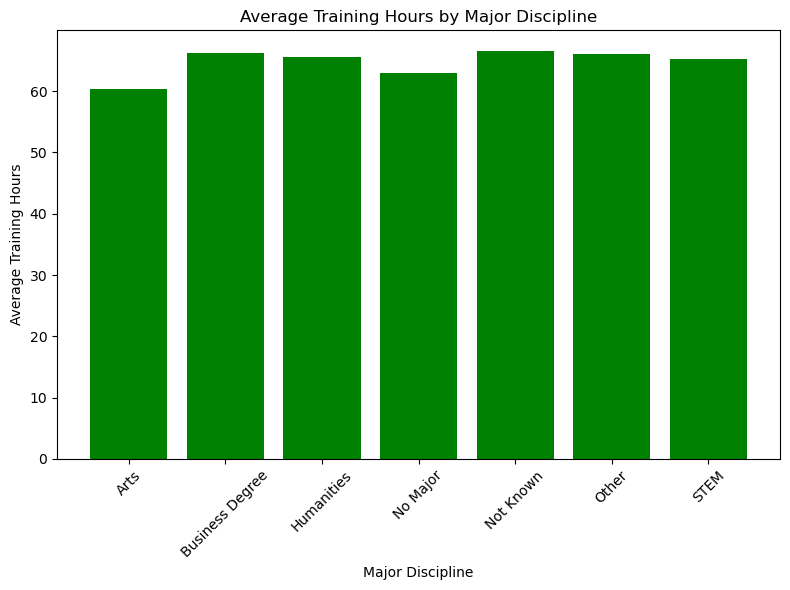

In [115]:
# Group by Major Discipline and calculate the mean of training_hours for each level
discipline_training = train.groupby('major_discipline')['training_hours'].mean()

# Plotting the bar chart
plt.figure(figsize=(8,6))
plt.bar(discipline_training.index, discipline_training.values, color = 'green')

# Add labels and title
plt.xlabel('Major Discipline')
plt.ylabel('Average Training Hours')
plt.title('Average Training Hours by Major Discipline')

# Rotate x-axis labels for better visibility
plt.xticks(rotation=45)

# Display the chart
plt.tight_layout()
plt.show()

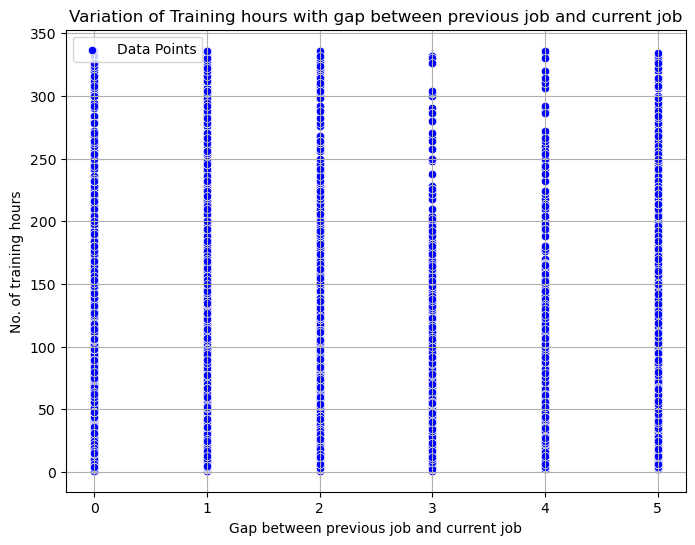

In [116]:
#Using scatter plot to compare last new job and training hours
plt.figure(figsize = (8,6))
sns.scatterplot(data=train, x='last_new_job', y='training_hours', color='blue', label='Data Points')
plt.xlabel('Gap between previous job and current job')
plt.ylabel('No. of training hours')
plt.title('Variation of Training hours with gap between previous job and current job')
#plt.legend()
plt.grid(True)
plt.show()

In [117]:
num_feat=train.iloc[:,:-1].select_dtypes("number").columns
cat_feat=train.select_dtypes("object").columns
print(num_feat)
print('--------------------------------------------------------------------------------')
print(cat_feat)

Index(['enrollee_id', 'city_development_index', 'experience', 'last_new_job',
       'training_hours'],
      dtype='object')
--------------------------------------------------------------------------------
Index(['city', 'gender', 'relevent_experience', 'enrolled_university',
       'education_level', 'major_discipline', 'company_size', 'company_type'],
      dtype='object')


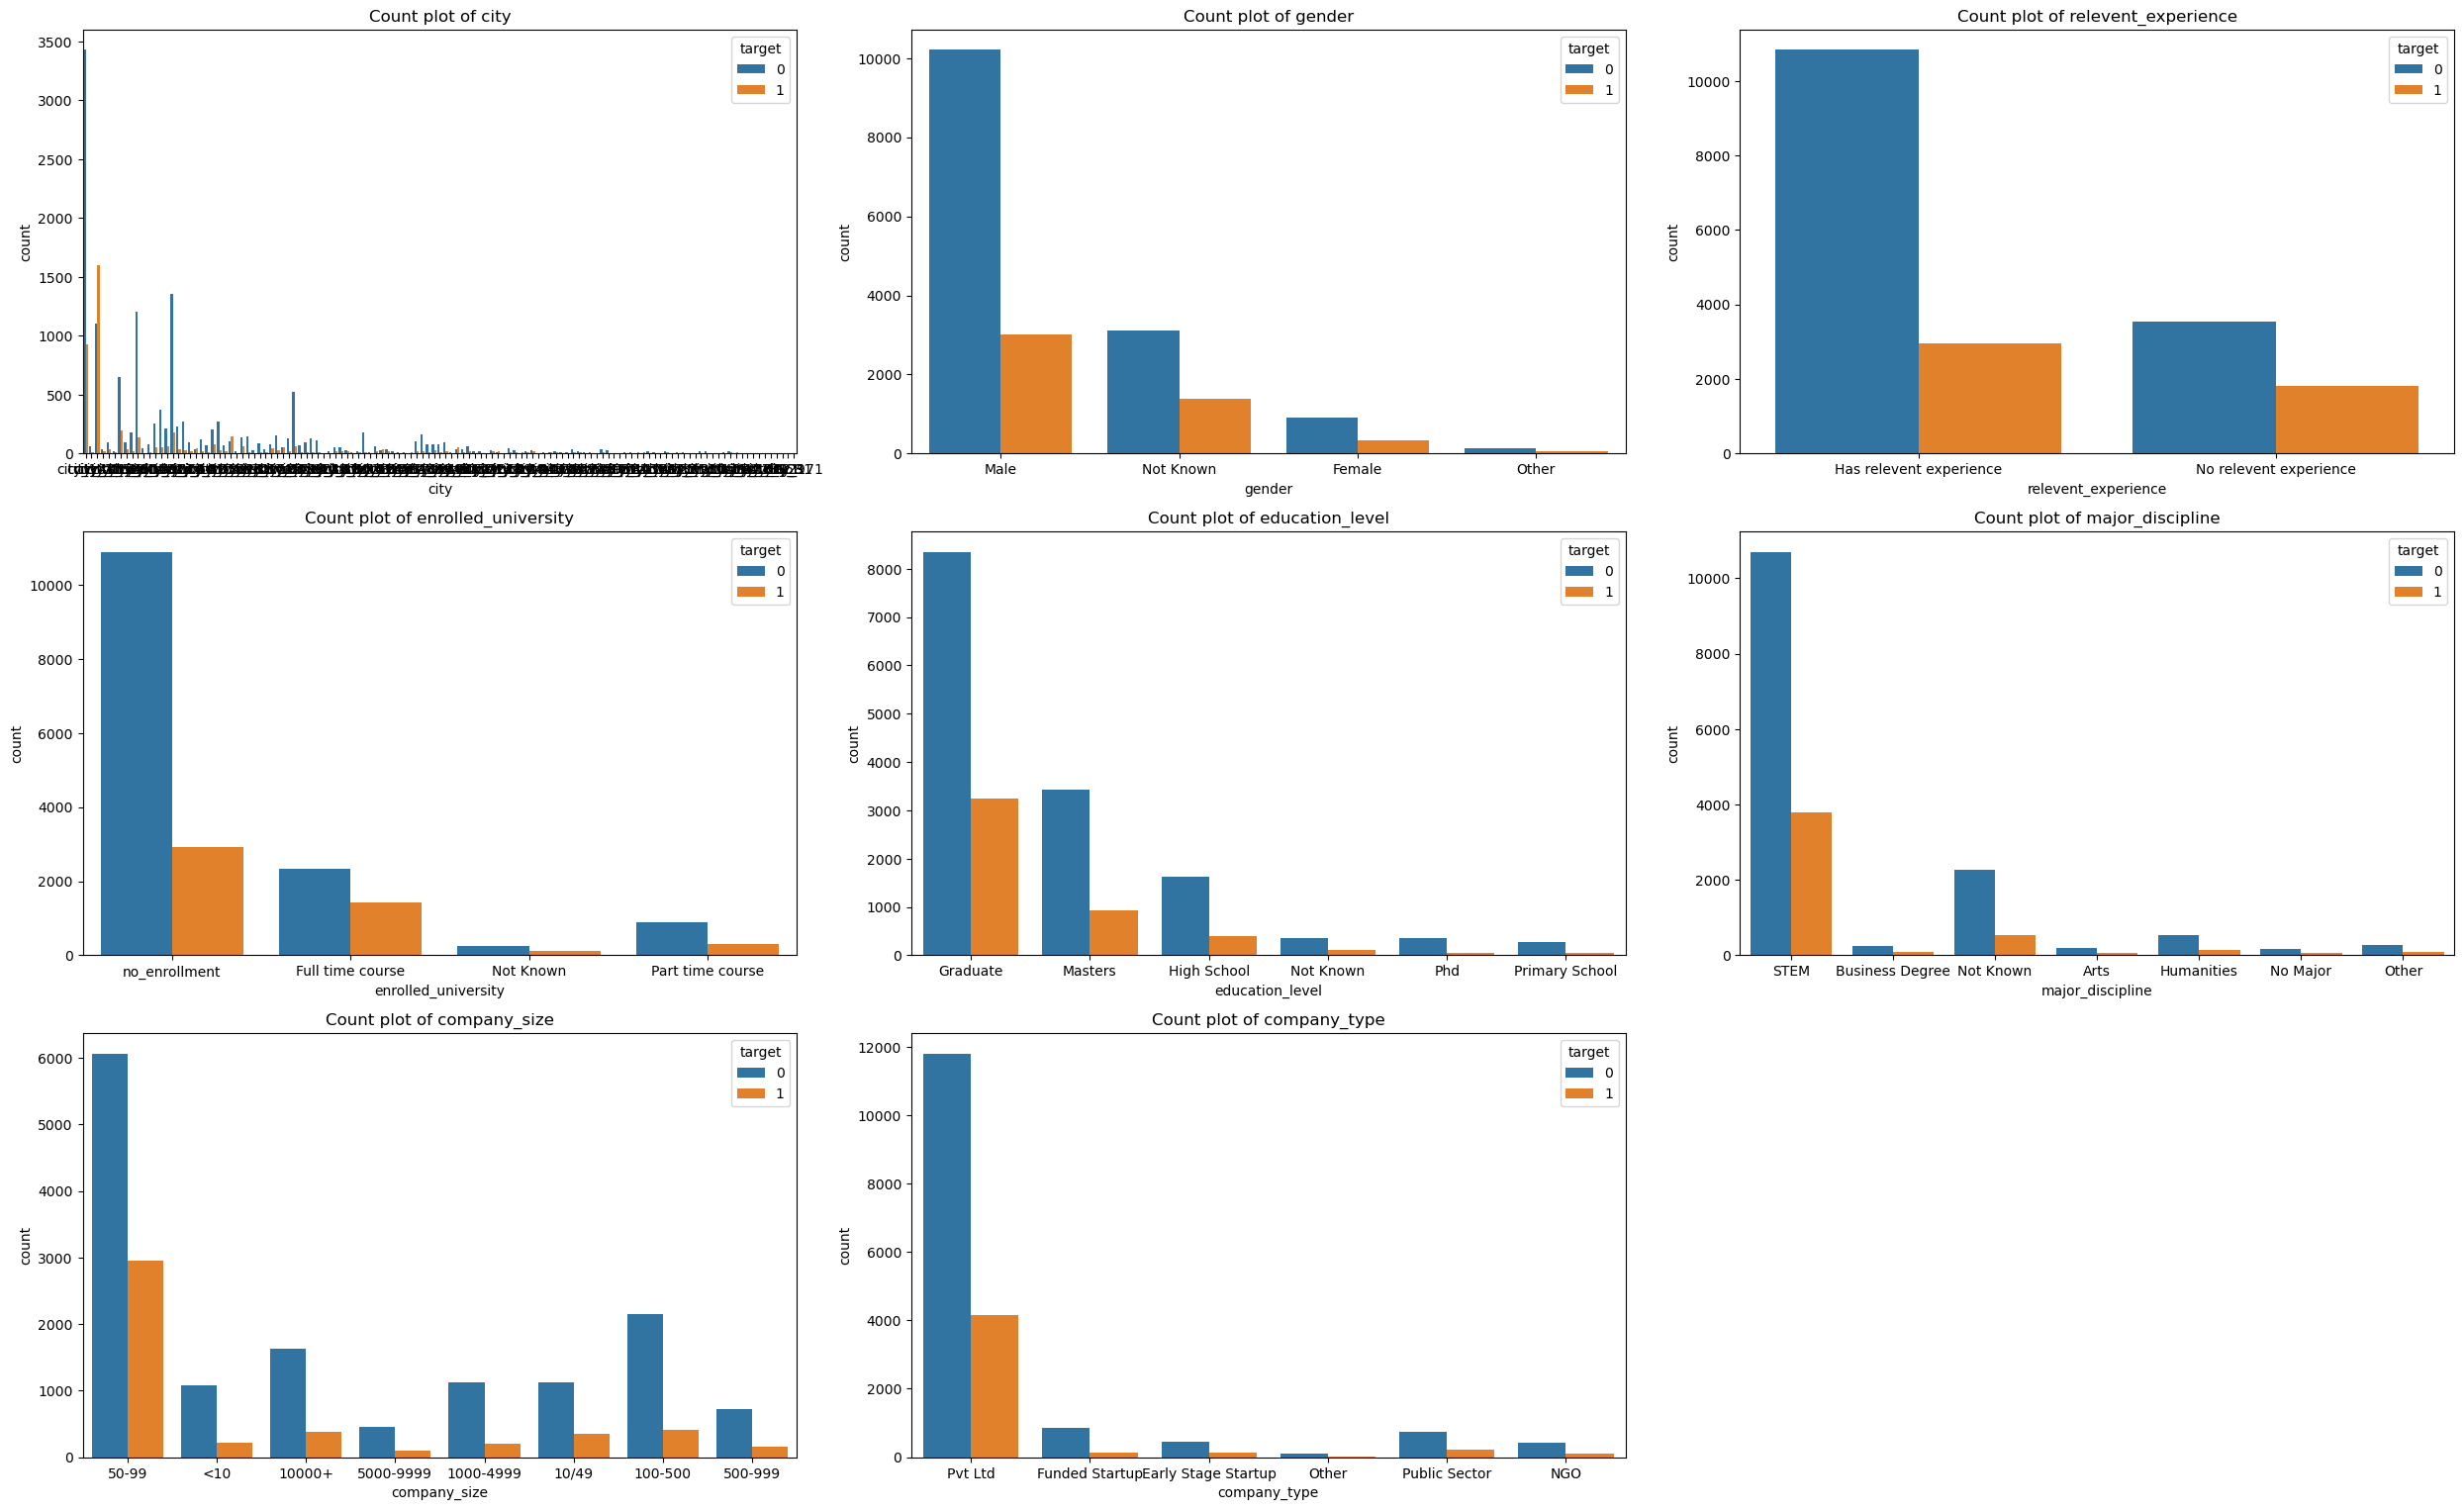

In [118]:
plt.figure(figsize=(25, 20))

for i in range(len(cat_feat)):
    plt.subplot(4, 3, i + 1)  # Create subplots (4,3 = grid size;i+1 = position of current sub plot)
    sns.countplot(x=cat_feat[i], data=train, hue='target')  # Set 'target' as the hue
    plt.title(f'Count plot of {cat_feat[i]}')

plt.tight_layout()  # Ensure subplots do not overlap
plt.show()

In [119]:
# Count the occurrences of each education level
education_counts = train['education_level'].value_counts()

education_dict = education_counts.to_dict()
print('Count of each Education level')
print('-------------------------------')
for education, count in education_dict.items():
    print('-------------------------------')
    print(education, ':',count)
print('-------------------------------')

Count of each Education level
-------------------------------
-------------------------------
Graduate : 11598
-------------------------------
Masters : 4361
-------------------------------
High School : 2017
-------------------------------
Not Known : 460
-------------------------------
Phd : 414
-------------------------------
Primary School : 308
-------------------------------


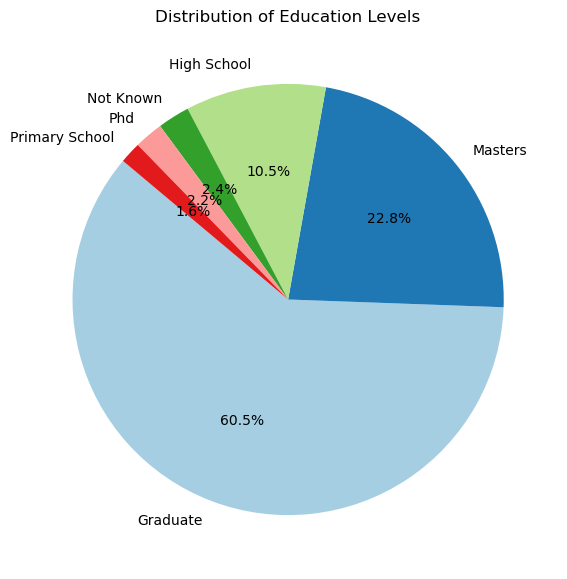

In [120]:
# Plotting the pie chart
plt.figure(figsize=(7, 7))
#autopct - display %value of each part on chart
#1.1f indicates that the percentage should be shown with one decimal place.
#The double % is used to display the percent sign (%) after the percentage value. (25% = 25.0%)
#startangle = defines starting angle of pie chart. default is 0.
#colors is used to define one of the many color themes provided by matplotlib
plt.pie(education_counts, labels=education_counts.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
plt.title('Distribution of Education Levels')
plt.show()

In [121]:
# Count the occurrences of each Major Discipline
major_discipline_counts= train['major_discipline'].value_counts()

major_discipline_dict = major_discipline_counts.to_dict()
print('Count of each major disciplines')
print('-------------------------------')
for discipline, count in major_discipline_dict.items():
    print('-------------------------------')
    print(discipline, ':',count)
print('-------------------------------')

Count of each major disciplines
-------------------------------
-------------------------------
STEM : 14492
-------------------------------
Not Known : 2813
-------------------------------
Humanities : 669
-------------------------------
Other : 381
-------------------------------
Business Degree : 327
-------------------------------
Arts : 253
-------------------------------
No Major : 223
-------------------------------


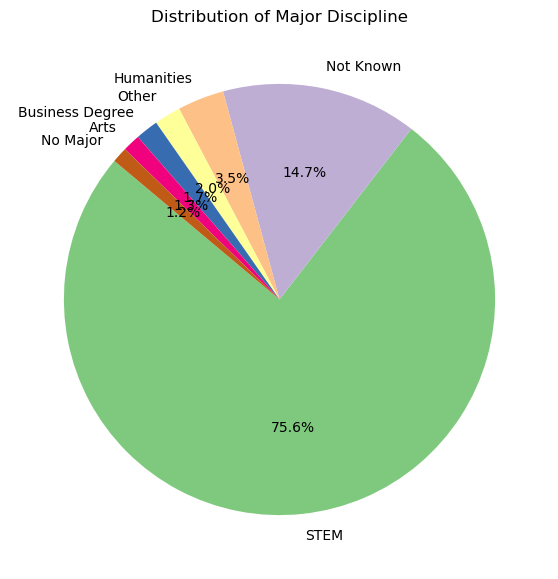

In [122]:
# Plotting the pie chart
plt.figure(figsize=(7, 7))

plt.pie(major_discipline_counts, labels=major_discipline_counts.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Accent.colors)
plt.title('Distribution of Major Discipline')
plt.show()

In [123]:
# Count the occurrences of each Experience
experience_counts= train['experience'].value_counts()

experience_dict = experience_counts.to_dict()
print('Count of each Experience Levels')
print('-------------------------------')
for experience, count in experience_dict.items():
    print('-------------------------------')
    print(experience, ':',count)
print('-------------------------------')

Count of each Experience Levels
-------------------------------
-------------------------------
1 : 4357
-------------------------------
5 : 1430
-------------------------------
4 : 1403
-------------------------------
3 : 1354
-------------------------------
6 : 1216
-------------------------------
2 : 1127
-------------------------------
9 : 1045
-------------------------------
7 : 1028
-------------------------------
10 : 985
-------------------------------
8 : 802
-------------------------------
15 : 686
-------------------------------
11 : 664
-------------------------------
14 : 586
-------------------------------
16 : 508
-------------------------------
12 : 494
-------------------------------
13 : 399
-------------------------------
17 : 342
-------------------------------
19 : 304
-------------------------------
18 : 280
-------------------------------
20 : 148
-------------------------------


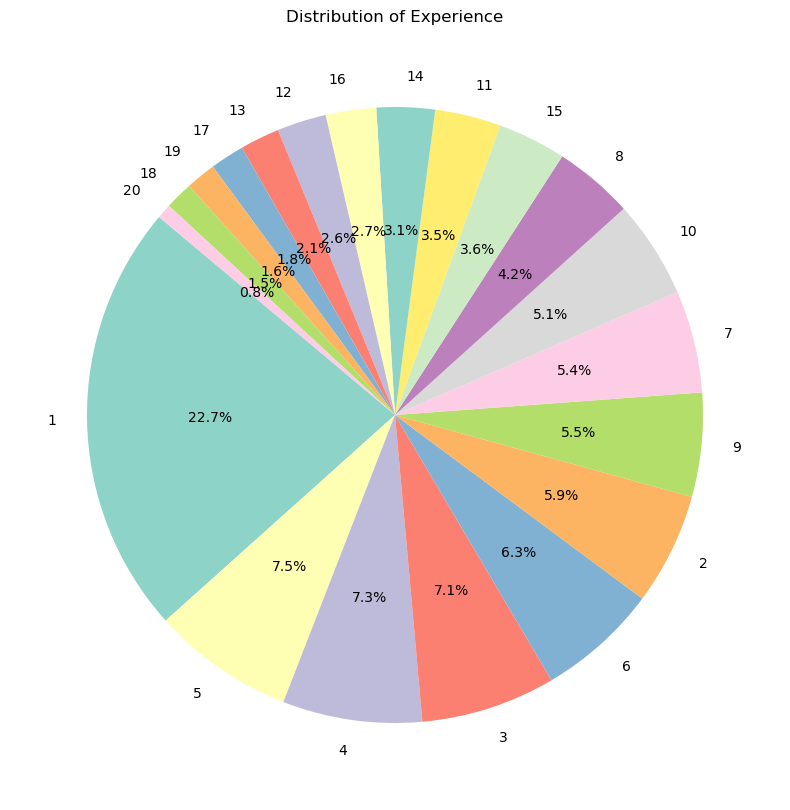

In [124]:
# Plotting the pie chart
plt.figure(figsize=(10, 10))

plt.pie(experience_counts, labels=experience_counts.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Set3.colors)
plt.title('Distribution of Experience')
plt.show()

In [125]:
train.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.92,Male,Has relevent experience,no_enrollment,Graduate,STEM,1,50-99,Pvt Ltd,1,36,1
1,29725,city_40,0.78,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,5,47,0
2,11561,city_21,0.62,Not Known,No relevent experience,Full time course,Graduate,STEM,5,50-99,Pvt Ltd,0,83,0
3,33241,city_115,0.79,Not Known,No relevent experience,Not Known,Graduate,Business Degree,1,50-99,Pvt Ltd,0,52,1
4,666,city_162,0.77,Male,Has relevent experience,no_enrollment,Masters,STEM,1,50-99,Funded Startup,4,8,0


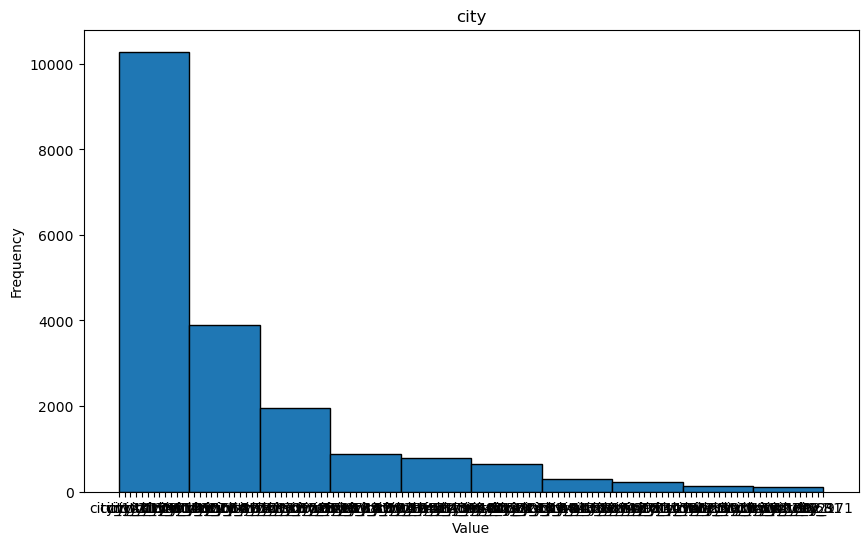

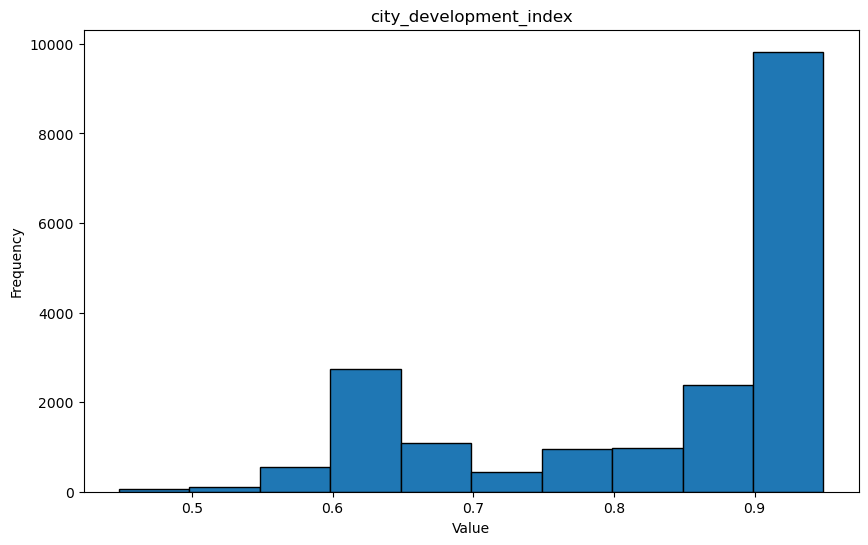

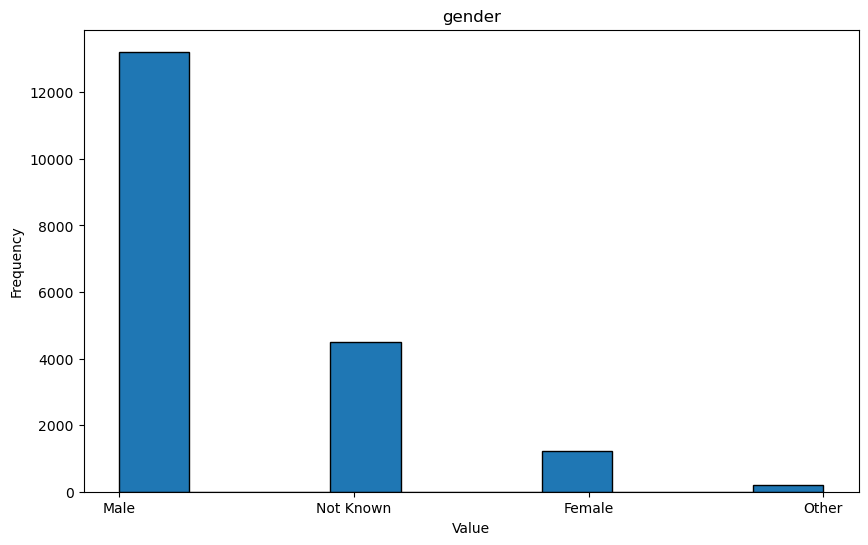

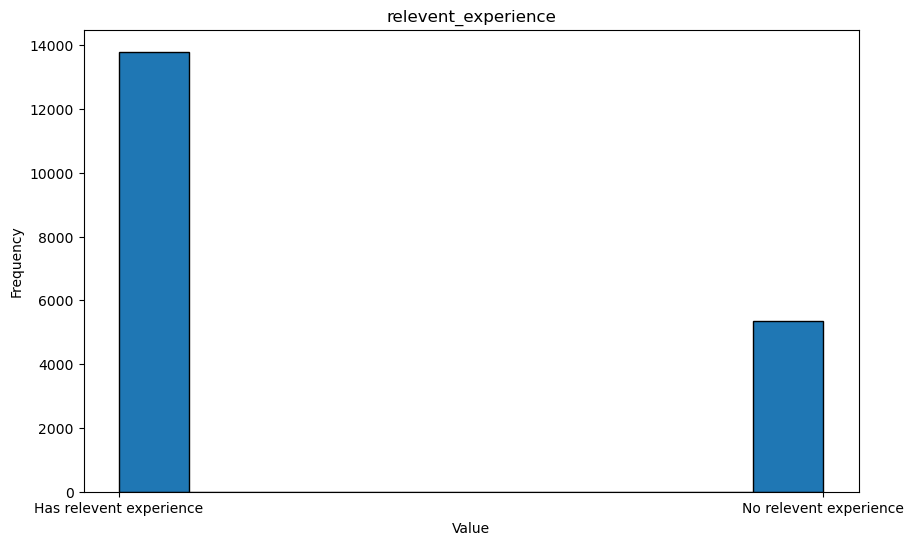

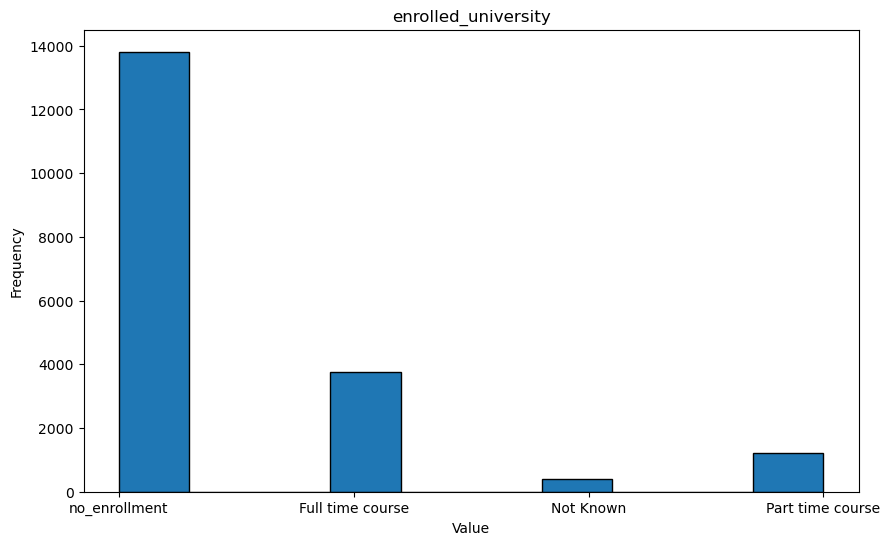

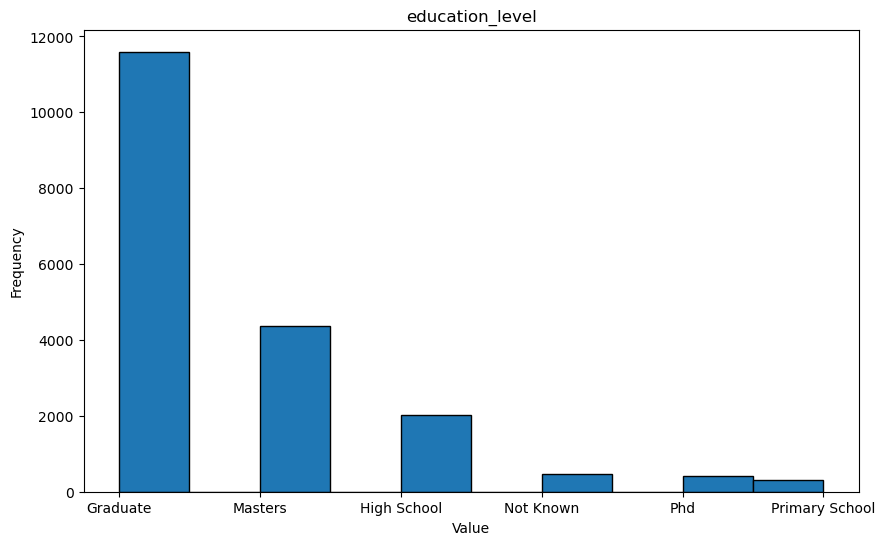

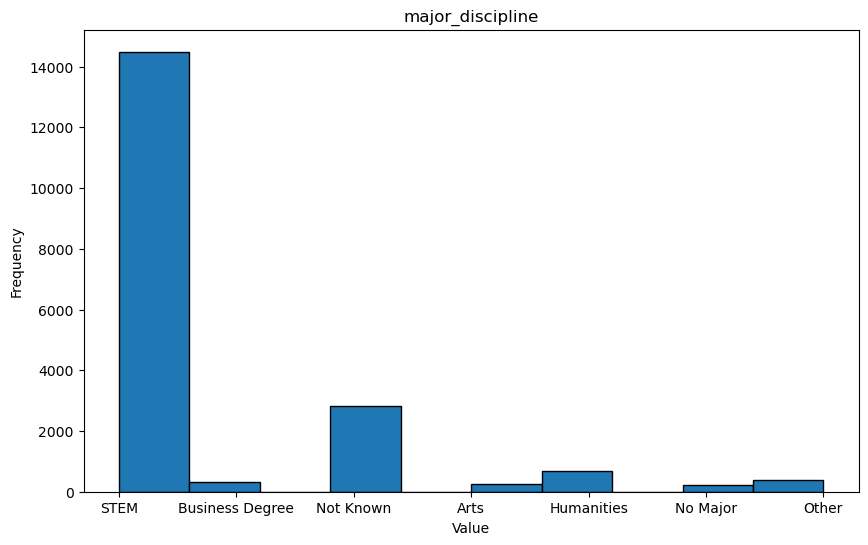

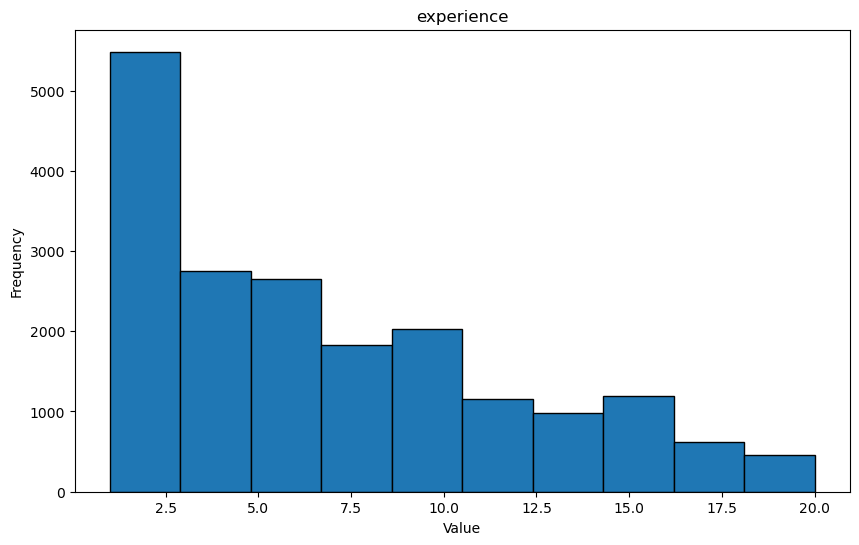

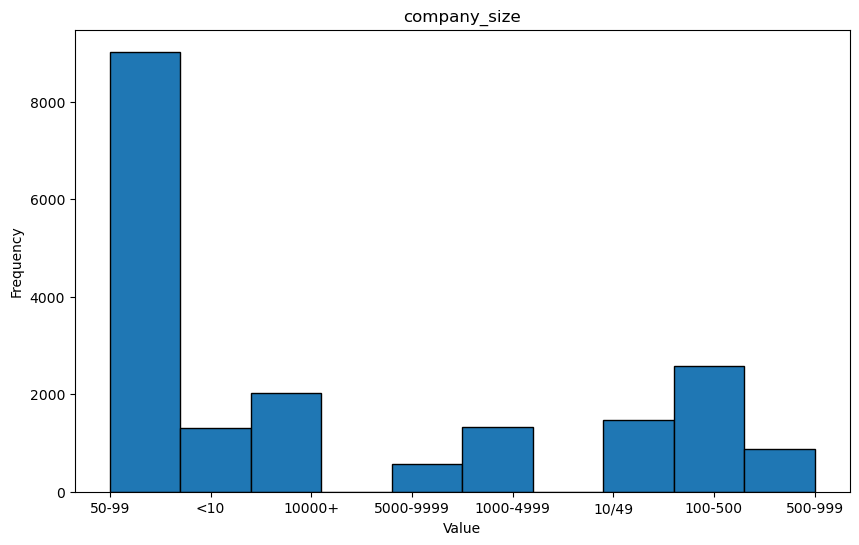

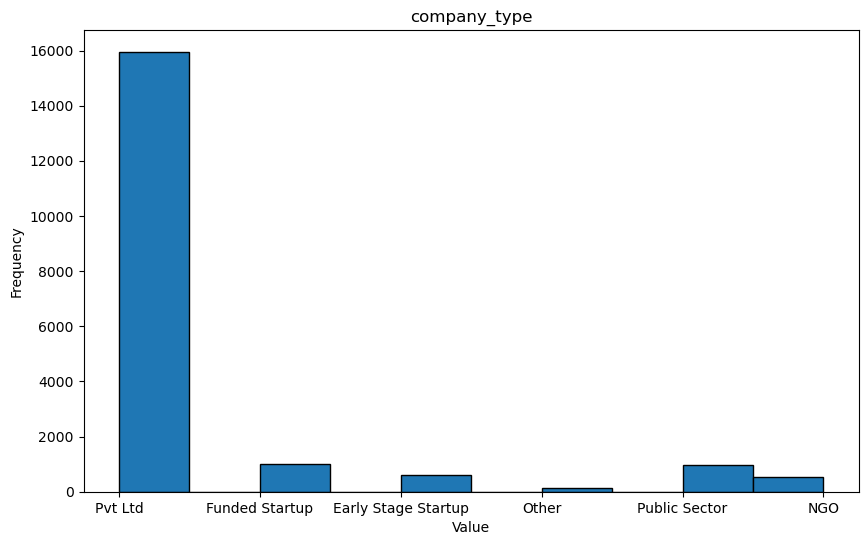

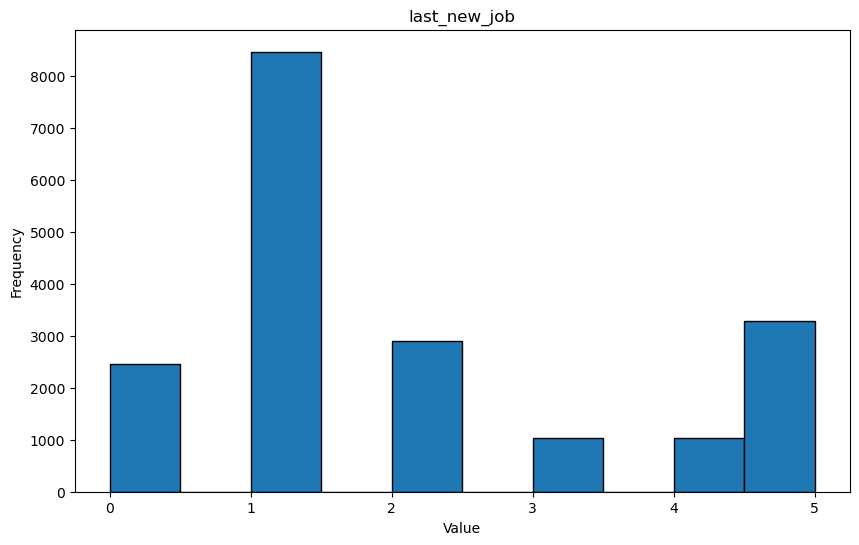

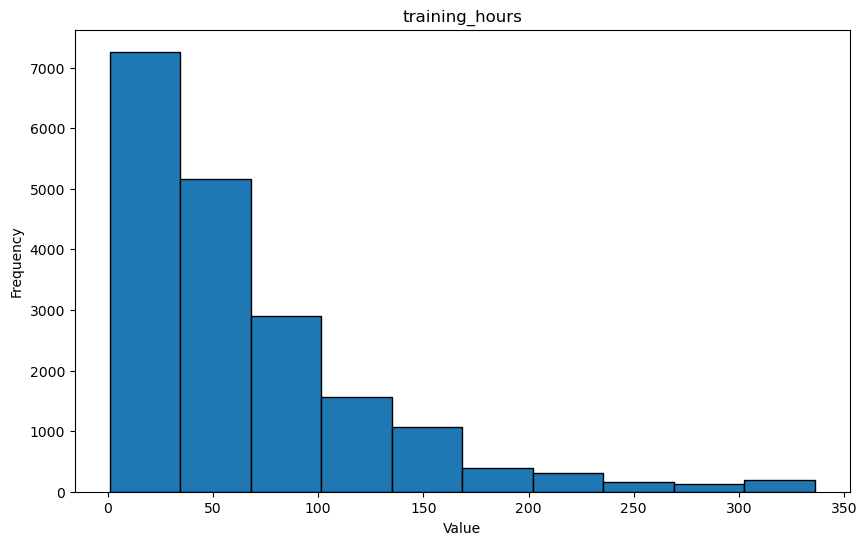

In [126]:
    # Plotting histogram
list = ['city','city_development_index','gender','relevent_experience','enrolled_university','education_level','major_discipline','experience',	'company_size','company_type','last_new_job','training_hours']
for i in list:    
     plt.figure(figsize=(10, 6))
     plt.hist(train[i], bins=10, edgecolor='black')
     plt.title(i)
     plt.xlabel('Value')
     plt.ylabel('Frequency')
     plt.show()

## 4. Encoding, Scaling and Normalization

### 4.1. Encoding

In [129]:
train.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.92,Male,Has relevent experience,no_enrollment,Graduate,STEM,1,50-99,Pvt Ltd,1,36,1
1,29725,city_40,0.78,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,5,47,0
2,11561,city_21,0.62,Not Known,No relevent experience,Full time course,Graduate,STEM,5,50-99,Pvt Ltd,0,83,0
3,33241,city_115,0.79,Not Known,No relevent experience,Not Known,Graduate,Business Degree,1,50-99,Pvt Ltd,0,52,1
4,666,city_162,0.77,Male,Has relevent experience,no_enrollment,Masters,STEM,1,50-99,Funded Startup,4,8,0


In [130]:
train['city'].nunique()

123

In [131]:
#Encoding city column
#using label encoding since column has many uinque values and can be assigned unique integer to each city.
label_encoder = LabelEncoder()
train['city_encoded'] = label_encoder.fit_transform(train['city'])
test['city_encoded'] = label_encoder.fit_transform(test['city'])
train.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target,city_encoded
0,8949,city_103,0.92,Male,Has relevent experience,no_enrollment,Graduate,STEM,1,50-99,Pvt Ltd,1,36,1,5
1,29725,city_40,0.78,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,5,47,0,77
2,11561,city_21,0.62,Not Known,No relevent experience,Full time course,Graduate,STEM,5,50-99,Pvt Ltd,0,83,0,64
3,33241,city_115,0.79,Not Known,No relevent experience,Not Known,Graduate,Business Degree,1,50-99,Pvt Ltd,0,52,1,14
4,666,city_162,0.77,Male,Has relevent experience,no_enrollment,Masters,STEM,1,50-99,Funded Startup,4,8,0,50


In [132]:
train['gender'].unique()

array(['Male', 'Not Known', 'Female', 'Other'], dtype=object)

In [133]:
encoded_train = pd.get_dummies(train, columns=['gender'])
encoded_test = pd.get_dummies(test, columns=['gender'])
encoded_train.head()

,enrollee_id,city,city_development_index,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target,city_encoded,gender_Female,gender_Male,gender_Not Known,gender_Other
0,8949,city_103,0.92,Has relevent experience,no_enrollment,Graduate,STEM,1,50-99,Pvt Ltd,1,36,1,5,False,True,False,False
1,29725,city_40,0.78,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,5,47,0,77,False,True,False,False
2,11561,city_21,0.62,No relevent experience,Full time course,Graduate,STEM,5,50-99,Pvt Ltd,0,83,0,64,False,False,True,False
3,33241,city_115,0.79,No relevent experience,Not Known,Graduate,Business Degree,1,50-99,Pvt Ltd,0,52,1,14,False,False,True,False
4,666,city_162,0.77,Has relevent experience,no_enrollment,Masters,STEM,1,50-99,Funded Startup,4,8,0,50,False,True,False,False


In [134]:
train['relevent_experience'].unique()

array(['Has relevent experience', 'No relevent experience'], dtype=object)

In [135]:
encoded_train['relevent_experience'] = encoded_train['relevent_experience'].replace('Has relevent experience', 1)
encoded_train['relevent_experience'] = encoded_train['relevent_experience'].replace('No relevent experience', 0)
encoded_test['relevent_experience']  = encoded_test['relevent_experience'].replace('Has relevent experience', 1)
encoded_test['relevent_experience']  = encoded_test['relevent_experience'].replace('No relevent experience', 0)
encoded_train.head()

,enrollee_id,city,city_development_index,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target,city_encoded,gender_Female,gender_Male,gender_Not Known,gender_Other
0,8949,city_103,0.92,1,no_enrollment,Graduate,STEM,1,50-99,Pvt Ltd,1,36,1,5,False,True,False,False
1,29725,city_40,0.78,0,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,5,47,0,77,False,True,False,False
2,11561,city_21,0.62,0,Full time course,Graduate,STEM,5,50-99,Pvt Ltd,0,83,0,64,False,False,True,False
3,33241,city_115,0.79,0,Not Known,Graduate,Business Degree,1,50-99,Pvt Ltd,0,52,1,14,False,False,True,False
4,666,city_162,0.77,1,no_enrollment,Masters,STEM,1,50-99,Funded Startup,4,8,0,50,False,True,False,False


In [136]:
train['enrolled_university'].unique()

array(['no_enrollment', 'Full time course', 'Not Known',
       'Part time course'], dtype=object)

In [137]:
encoded_train = pd.get_dummies(encoded_train, columns=['enrolled_university'])
encoded_test = pd.get_dummies(encoded_test, columns=['enrolled_university'])
encoded_train.head()

,enrollee_id,city,city_development_index,relevent_experience,education_level,major_discipline,experience,company_size,company_type,last_new_job,...,target,city_encoded,gender_Female,gender_Male,gender_Not Known,gender_Other,enrolled_university_Full time course,enrolled_university_Not Known,enrolled_university_Part time course,enrolled_university_no_enrollment
0,8949,city_103,0.92,1,Graduate,STEM,1,50-99,Pvt Ltd,1,...,1,5,False,True,False,False,False,False,False,True
1,29725,city_40,0.78,0,Graduate,STEM,15,50-99,Pvt Ltd,5,...,0,77,False,True,False,False,False,False,False,True
2,11561,city_21,0.62,0,Graduate,STEM,5,50-99,Pvt Ltd,0,...,0,64,False,False,True,False,True,False,False,False
3,33241,city_115,0.79,0,Graduate,Business Degree,1,50-99,Pvt Ltd,0,...,1,14,False,False,True,False,False,True,False,False
4,666,city_162,0.77,1,Masters,STEM,1,50-99,Funded Startup,4,...,0,50,False,True,False,False,False,False,False,True


In [138]:
train['education_level'].unique()

array(['Graduate', 'Masters', 'High School', 'Not Known', 'Phd',
       'Primary School'], dtype=object)

In [139]:
encoded_train = pd.get_dummies(encoded_train, columns=['education_level'])
encoded_test = pd.get_dummies(encoded_test, columns=['education_level'])
encoded_train.head()

,enrollee_id,city,city_development_index,relevent_experience,major_discipline,experience,company_size,company_type,last_new_job,training_hours,...,enrolled_university_Full time course,enrolled_university_Not Known,enrolled_university_Part time course,enrolled_university_no_enrollment,education_level_Graduate,education_level_High School,education_level_Masters,education_level_Not Known,education_level_Phd,education_level_Primary School
0,8949,city_103,0.92,1,STEM,1,50-99,Pvt Ltd,1,36,...,False,False,False,True,True,False,False,False,False,False
1,29725,city_40,0.78,0,STEM,15,50-99,Pvt Ltd,5,47,...,False,False,False,True,True,False,False,False,False,False
2,11561,city_21,0.62,0,STEM,5,50-99,Pvt Ltd,0,83,...,True,False,False,False,True,False,False,False,False,False
3,33241,city_115,0.79,0,Business Degree,1,50-99,Pvt Ltd,0,52,...,False,True,False,False,True,False,False,False,False,False
4,666,city_162,0.77,1,STEM,1,50-99,Funded Startup,4,8,...,False,False,False,True,False,False,True,False,False,False


In [140]:
train['major_discipline'].unique()

array(['STEM', 'Business Degree', 'Not Known', 'Arts', 'Humanities',
       'No Major', 'Other'], dtype=object)

In [141]:
encoded_train = pd.get_dummies(encoded_train, columns=['major_discipline'])
encoded_test = pd.get_dummies(encoded_test, columns=['major_discipline'])
encoded_train.head()

,enrollee_id,city,city_development_index,relevent_experience,experience,company_size,company_type,last_new_job,training_hours,target,...,education_level_Not Known,education_level_Phd,education_level_Primary School,major_discipline_Arts,major_discipline_Business Degree,major_discipline_Humanities,major_discipline_No Major,major_discipline_Not Known,major_discipline_Other,major_discipline_STEM
0,8949,city_103,0.92,1,1,50-99,Pvt Ltd,1,36,1,...,False,False,False,False,False,False,False,False,False,True
1,29725,city_40,0.78,0,15,50-99,Pvt Ltd,5,47,0,...,False,False,False,False,False,False,False,False,False,True
2,11561,city_21,0.62,0,5,50-99,Pvt Ltd,0,83,0,...,False,False,False,False,False,False,False,False,False,True
3,33241,city_115,0.79,0,1,50-99,Pvt Ltd,0,52,1,...,False,False,False,False,True,False,False,False,False,False
4,666,city_162,0.77,1,1,50-99,Funded Startup,4,8,0,...,False,False,False,False,False,False,False,False,False,True


In [142]:
train['company_size'].unique()

array(['50-99', '<10', '10000+', '5000-9999', '1000-4999', '10/49',
       '100-500', '500-999'], dtype=object)

In [143]:
encoded_train = pd.get_dummies(encoded_train, columns=['company_size'])
encoded_test = pd.get_dummies(encoded_test, columns=['company_size'])
encoded_train.head()

,enrollee_id,city,city_development_index,relevent_experience,experience,company_type,last_new_job,training_hours,target,city_encoded,...,major_discipline_Other,major_discipline_STEM,company_size_10/49,company_size_100-500,company_size_1000-4999,company_size_10000+,company_size_50-99,company_size_500-999,company_size_5000-9999,company_size_<10
0,8949,city_103,0.92,1,1,Pvt Ltd,1,36,1,5,...,False,True,False,False,False,False,True,False,False,False
1,29725,city_40,0.78,0,15,Pvt Ltd,5,47,0,77,...,False,True,False,False,False,False,True,False,False,False
2,11561,city_21,0.62,0,5,Pvt Ltd,0,83,0,64,...,False,True,False,False,False,False,True,False,False,False
3,33241,city_115,0.79,0,1,Pvt Ltd,0,52,1,14,...,False,False,False,False,False,False,True,False,False,False
4,666,city_162,0.77,1,1,Funded Startup,4,8,0,50,...,False,True,False,False,False,False,True,False,False,False


In [144]:
train['company_type'].unique()

array(['Pvt Ltd', 'Funded Startup', 'Early Stage Startup', 'Other',
       'Public Sector', 'NGO'], dtype=object)

In [145]:
encoded_train = pd.get_dummies(encoded_train, columns=['company_type'])
encoded_test = pd.get_dummies(encoded_test, columns=['company_type'])
encoded_train.head()

,enrollee_id,city,city_development_index,relevent_experience,experience,last_new_job,training_hours,target,city_encoded,gender_Female,...,company_size_50-99,company_size_500-999,company_size_5000-9999,company_size_<10,company_type_Early Stage Startup,company_type_Funded Startup,company_type_NGO,company_type_Other,company_type_Public Sector,company_type_Pvt Ltd
0,8949,city_103,0.92,1,1,1,36,1,5,False,...,True,False,False,False,False,False,False,False,False,True
1,29725,city_40,0.78,0,15,5,47,0,77,False,...,True,False,False,False,False,False,False,False,False,True
2,11561,city_21,0.62,0,5,0,83,0,64,False,...,True,False,False,False,False,False,False,False,False,True
3,33241,city_115,0.79,0,1,0,52,1,14,False,...,True,False,False,False,False,False,False,False,False,True
4,666,city_162,0.77,1,1,4,8,0,50,False,...,True,False,False,False,False,True,False,False,False,False


In [146]:
list1 =['city_development_index','relevent_experience','experience','last_new_job','training_hours','city_encoded'	]

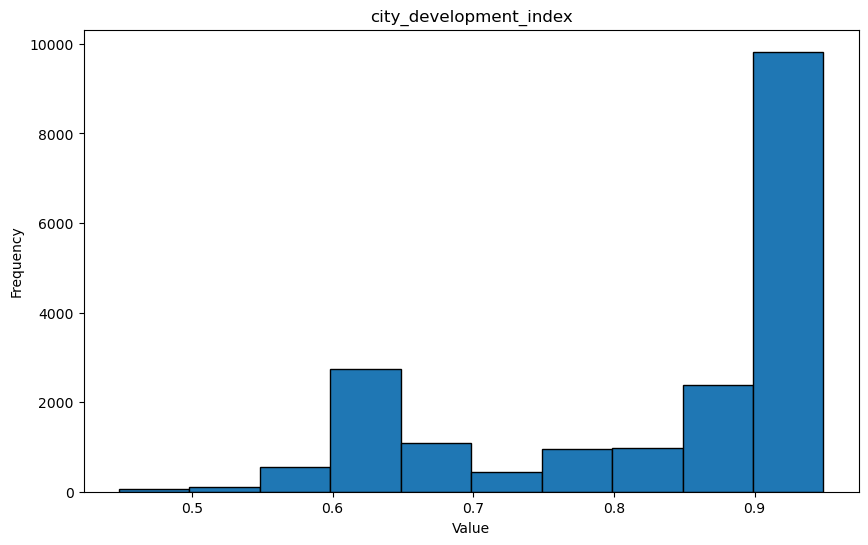

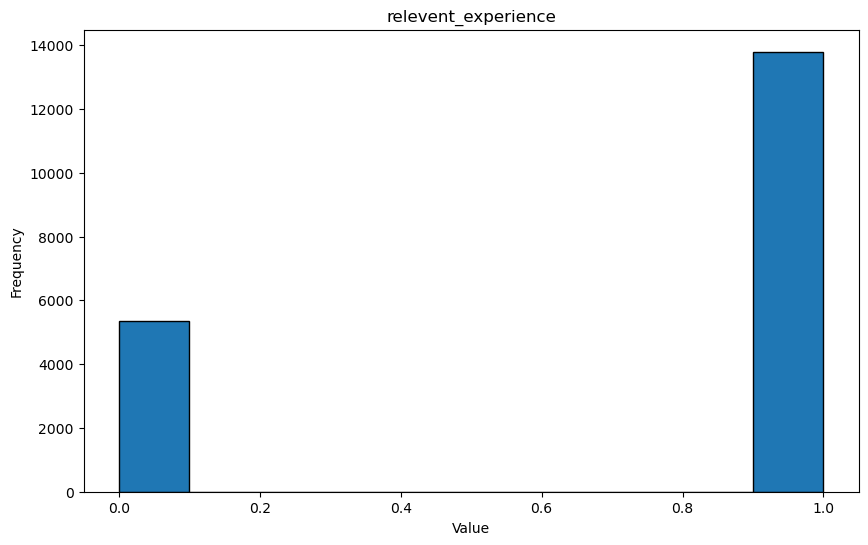

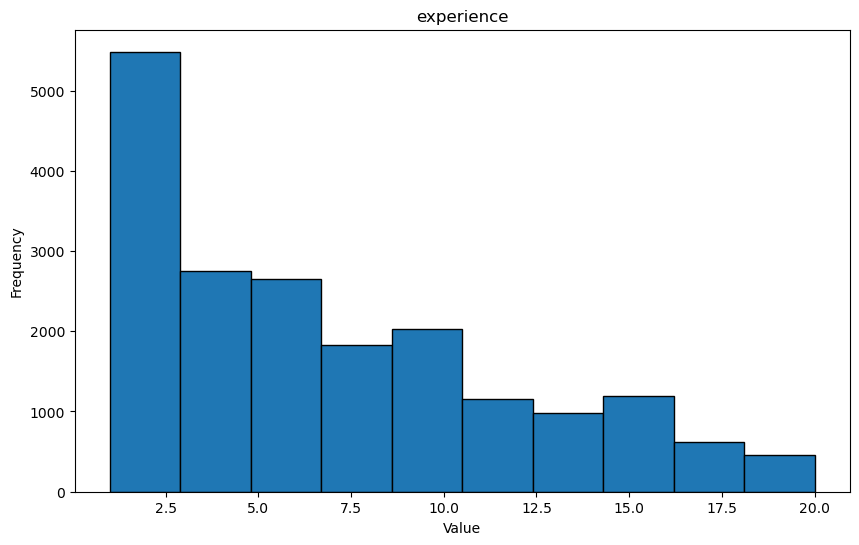

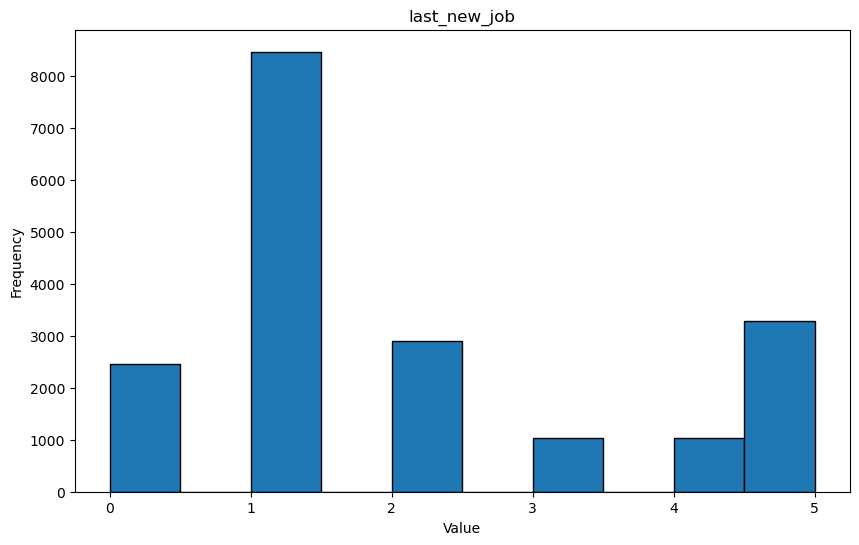

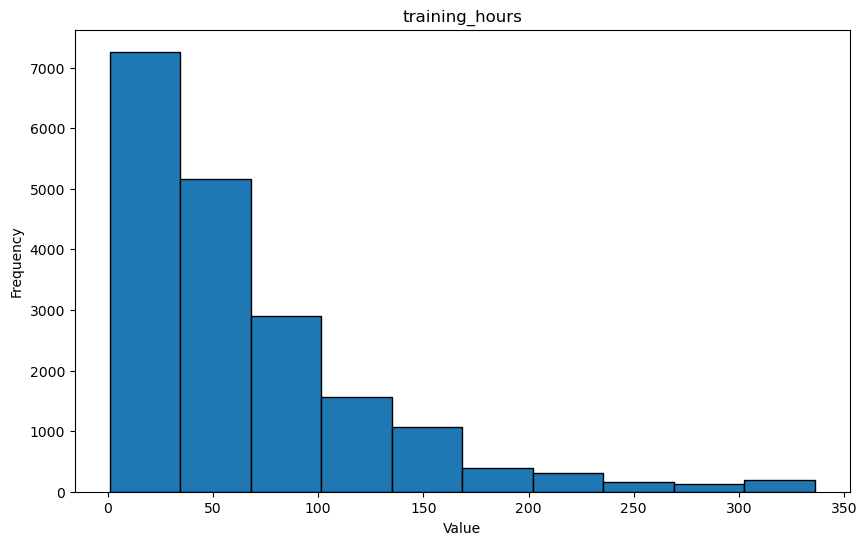

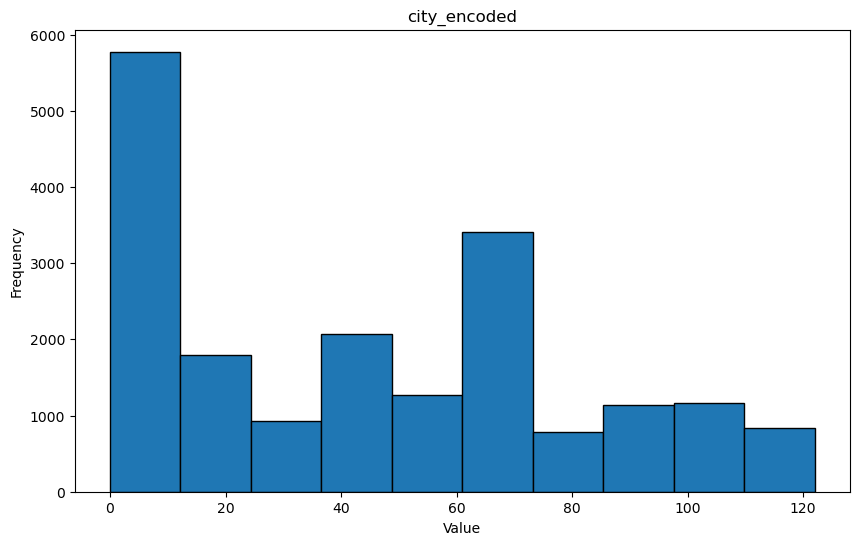

In [147]:
 # Plotting histogram
for i in list1:
     plt.figure(figsize=(10, 6))
     plt.hist(encoded_train[i], bins=10, edgecolor='black')
     plt.title(i)
     plt.xlabel('Value')
     plt.ylabel('Frequency')
     plt.show()

In [148]:
encoded_train.columns

Index(['enrollee_id', 'city', 'city_development_index', 'relevent_experience',
       'experience', 'last_new_job', 'training_hours', 'target',
       'city_encoded', 'gender_Female', 'gender_Male', 'gender_Not Known',
       'gender_Other', 'enrolled_university_Full time course',
       'enrolled_university_Not Known', 'enrolled_university_Part time course',
       'enrolled_university_no_enrollment', 'education_level_Graduate',
       'education_level_High School', 'education_level_Masters',
       'education_level_Not Known', 'education_level_Phd',
       'education_level_Primary School', 'major_discipline_Arts',
       'major_discipline_Business Degree', 'major_discipline_Humanities',
       'major_discipline_No Major', 'major_discipline_Not Known',
       'major_discipline_Other', 'major_discipline_STEM', 'company_size_10/49',
       'company_size_100-500', 'company_size_1000-4999', 'company_size_10000+',
       'company_size_50-99', 'company_size_500-999', 'company_size_5000-9999

### 4.2. Scaling

In [150]:
list2 =['city_development_index','experience','last_new_job','training_hours','city_encoded']

In [151]:
for i in list2:
     # Quantile transformation
     qt = QuantileTransformer(output_distribution='normal')  # or 'uniform'
     encoded_train[i] = qt.fit_transform(encoded_train[[i]])

In [152]:
for i in list2:
     # Quantile transformation
     qt = QuantileTransformer(output_distribution='normal')  # or 'uniform'
     encoded_test[i] = qt.fit_transform(encoded_test[[i]])

In [153]:
# Quantile transformation
qt = QuantileTransformer(output_distribution='normal')  # or 'uniform'
encoded_train['experience'] = qt.fit_transform(encoded_train[['experience']])
# Quantile transformation
qt = QuantileTransformer(output_distribution='normal')  # or 'uniform'
encoded_test['experience'] = qt.fit_transform(encoded_test[['experience']])

In [154]:
# Quantile transformation
qt = QuantileTransformer(output_distribution='normal')  # or 'uniform'
encoded_train['last_new_job'] = qt.fit_transform(encoded_train[['last_new_job']])
# Quantile transformation
qt = QuantileTransformer(output_distribution='normal')  # or 'uniform'
encoded_test['last_new_job'] = qt.fit_transform(encoded_test[['last_new_job']])

### 4.3. Normalization

In [156]:
encoded_train.head()

,enrollee_id,city,city_development_index,relevent_experience,experience,last_new_job,training_hours,target,city_encoded,gender_Female,...,company_size_50-99,company_size_500-999,company_size_5000-9999,company_size_<10,company_type_Early Stage Startup,company_type_Funded Startup,company_type_NGO,company_type_Other,company_type_Public Sector,company_type_Pvt Ltd
0,8949,city_103,0.61,1,-5.20,-0.39,-0.26,1,-1.03,False,...,True,False,False,False,False,False,False,False,False,True
1,29725,city_40,-0.53,0,1.29,5.20,0.00,0,0.88,False,...,True,False,False,False,False,False,False,False,False,True
2,11561,city_21,-1.24,0,-0.09,-5.20,0.60,0,0.52,False,...,True,False,False,False,False,False,False,False,False,True
3,33241,city_115,-0.52,0,-5.20,-5.20,0.12,1,-0.33,False,...,True,False,False,False,False,False,False,False,False,True
4,666,city_162,-0.55,1,-5.20,0.84,-1.53,0,0.24,False,...,True,False,False,False,False,True,False,False,False,False


In [157]:
# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Select the specific column to scale 
encoded_train[['city_development_index']] = scaler.fit_transform(encoded_train[['city_development_index']])
encoded_test[['city_development_index']] = scaler.fit_transform(encoded_test[['city_development_index']])

In [158]:
# Select the specific column to scale 
encoded_train[['experience']] = scaler.fit_transform(encoded_train[['experience']])
encoded_test[['experience']] = scaler.fit_transform(encoded_test[['experience']])

In [159]:
# Select the specific column to scale 
encoded_train[['last_new_job']] = scaler.fit_transform(encoded_train[['last_new_job']])
encoded_test[['last_new_job']] = scaler.fit_transform(encoded_test[['last_new_job']])

In [160]:
# Select the specific column to scale 
encoded_train[['training_hours']] = scaler.fit_transform(encoded_train[['training_hours']])
encoded_test[['training_hours']] = scaler.fit_transform(encoded_test[['training_hours']])

In [161]:
# Select the specific column to scale 
encoded_train[['city_encoded']] = scaler.fit_transform(encoded_train[['city_encoded']])
encoded_test[['city_encoded']] = scaler.fit_transform(encoded_test[['city_encoded']])

In [162]:
encoded_train.head()

,enrollee_id,city,city_development_index,relevent_experience,experience,last_new_job,training_hours,target,city_encoded,gender_Female,...,company_size_50-99,company_size_500-999,company_size_5000-9999,company_size_<10,company_type_Early Stage Startup,company_type_Funded Startup,company_type_NGO,company_type_Other,company_type_Public Sector,company_type_Pvt Ltd
0,8949,city_103,0.56,1,0.00,0.46,0.48,1,0.40,False,...,True,False,False,False,False,False,False,False,False,True
1,29725,city_40,0.45,0,0.62,1.00,0.50,0,0.58,False,...,True,False,False,False,False,False,False,False,False,True
2,11561,city_21,0.38,0,0.49,0.00,0.56,0,0.55,False,...,True,False,False,False,False,False,False,False,False,True
3,33241,city_115,0.45,0,0.00,0.00,0.51,1,0.47,False,...,True,False,False,False,False,False,False,False,False,True
4,666,city_162,0.45,1,0.00,0.58,0.35,0,0.52,False,...,True,False,False,False,False,True,False,False,False,False


## 5. Deleting unnecessary Columns

In [164]:
#Delete multiple columns 
encoded_train = encoded_train.drop(['enrollee_id', 'city'], axis=1)
encoded_test = encoded_test.drop(['enrollee_id', 'city'], axis=1)
encoded_train.head()

,city_development_index,relevent_experience,experience,last_new_job,training_hours,target,city_encoded,gender_Female,gender_Male,gender_Not Known,...,company_size_50-99,company_size_500-999,company_size_5000-9999,company_size_<10,company_type_Early Stage Startup,company_type_Funded Startup,company_type_NGO,company_type_Other,company_type_Public Sector,company_type_Pvt Ltd
0,0.56,1,0.00,0.46,0.48,1,0.40,False,True,False,...,True,False,False,False,False,False,False,False,False,True
1,0.45,0,0.62,1.00,0.50,0,0.58,False,True,False,...,True,False,False,False,False,False,False,False,False,True
2,0.38,0,0.49,0.00,0.56,0,0.55,False,False,True,...,True,False,False,False,False,False,False,False,False,True
3,0.45,0,0.00,0.00,0.51,1,0.47,False,False,True,...,True,False,False,False,False,False,False,False,False,True
4,0.45,1,0.00,0.58,0.35,0,0.52,False,True,False,...,True,False,False,False,False,True,False,False,False,False


In [165]:
X=encoded_train.drop(["target"], axis=1)

In [166]:
y = encoded_train['target']

## 6. Train- Test Split 

In [167]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

## 7. Modeling

### 7.1. Selecting an appropriate model

In [168]:
#from lazypredict.Supervised import LazyClassifier, LazyRegressor

In [169]:
clf = LazyClassifier(verbose=0, ignore_warnings=True, custom_metric=None)
models, predictions = clf.fit(X_train, X_test, y_train, y_test)
models

 97%|█████████▋| 30/31 [00:45<00:01,  1.85s/it]

[LightGBM] [Info] Number of positive: 3346, number of negative: 10064
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003422 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 476
[LightGBM] [Info] Number of data points in the train set: 13410, number of used features: 6
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.249515 -> initscore=-1.101199
[LightGBM] [Info] Start training from score -1.101199


100%|██████████| 31/31 [00:46<00:00,  1.50s/it]


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
NearestCentroid,0.66,0.65,0.65,0.68,0.04
AdaBoostClassifier,0.78,0.64,0.64,0.76,0.44
SVC,0.78,0.64,0.64,0.76,13.89
LGBMClassifier,0.77,0.64,0.64,0.75,0.98
XGBClassifier,0.76,0.62,0.62,0.74,0.48
LabelSpreading,0.75,0.62,0.62,0.74,14.15
LabelPropagation,0.75,0.62,0.62,0.73,10.34
KNeighborsClassifier,0.74,0.61,0.61,0.73,0.52
RandomForestClassifier,0.73,0.60,0.60,0.72,1.99


### 7.2. Fitting the training and test data

In [170]:
#Train the AdaBoost Classifier
# Using a Decision Tree as the base estimator
base_estimator = DecisionTreeClassifier(max_depth=1)  # Weak learner
model = AdaBoostClassifier(n_estimators=50, random_state=42)
model.fit(X_train, y_train)

#Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy Score: {accuracy:.2f}')


Accuracy Score: 0.77


### 7.3. Performing cross validation

In [171]:
# Assume X_train and y_train are already defined
model = AdaBoostClassifier()

# Perform 5-fold cross-validation
cv_scores = cross_val_score(model, X_train, y_train, cv=5)

# Calculate the mean accuracy across the 5 folds
mean_cv_accuracy = cv_scores.mean()
print(f"Mean Cross-Validation Accuracy: {mean_cv_accuracy:.2f}")

Mean Cross-Validation Accuracy: 0.78


### 7.4. Hyperparameter Tuning

In [172]:
#Define the hyperparameter grid
param_grid = {
    'n_estimators': [50, 100, 200],           # Number of estimators
    'learning_rate': [0.01, 0.1, 1, 10],      # Learning rate
    #'base_estimator': [DecisionTreeClassifier(max_depth=1), DecisionTreeClassifier(max_depth=2)]  # Base estimator options
}

#Run Grid Search
grid_search = GridSearchCV(AdaBoostClassifier(), param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

#Evaluate the best model
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
best_params = grid_search.best_params_
# Check the best hyperparameters
print("Best Hyperparameters:", best_params )

# Evaluate the model performance
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy Score: {accuracy:.2f}')

# Optional: Additional metrics
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Best Hyperparameters: {'learning_rate': 0.01, 'n_estimators': 50}
Accuracy Score: 0.78

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.90      0.86      4317
           1       0.58      0.40      0.48      1431

    accuracy                           0.78      5748
   macro avg       0.70      0.65      0.67      5748
weighted avg       0.76      0.78      0.76      5748

Confusion Matrix:
[[3900  417]
 [ 852  579]]


### 7.5. Fitting the data with best parameters

In [173]:
final_model = AdaBoostClassifier(**best_params)
final_model.fit(X_train, y_train)

AdaBoostClassifier(learning_rate=0.01)

In [174]:
# Make predictions on the test set
y_pred = final_model.predict(X_test)


In [175]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {accuracy:.2f}")

# Optional: Other evaluation metrics
print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Test Accuracy: 0.78
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.90      0.86      4317
           1       0.58      0.40      0.48      1431

    accuracy                           0.78      5748
   macro avg       0.70      0.65      0.67      5748
weighted avg       0.76      0.78      0.76      5748

Confusion Matrix:
[[3900  417]
 [ 852  579]]


### 7.6. Performing cross validation  

In [176]:
# Perform cross-validation
cv_scores = cross_val_score(final_model, X_train, y_train, cv=5, scoring='accuracy')

# Calculate the mean cross-validated accuracy
print(f"Cross-Validated Accuracy: {cv_scores.mean():.2f}")

Cross-Validated Accuracy: 0.78


### 7.7. Trying out on unseen data

In [351]:
# Use your trained model to make predictions on the unseen data
y_unseen_pred = final_model.predict(encoded_test)

In [359]:
# Create a DataFrame to store the predictions
encoded_test['pred_target'] = y_unseen_pred